In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [38]:
PATH_TO_TRAIN = 'csv/train.csv'
PATH_TO_TEST = 'csv/test.csv'

In [39]:
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
test = pd.read_csv(PATH_TO_TEST, index_col='PassengerId')

----------
# Обзор данных

In [86]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [42]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [43]:
train[(train['Age'] < 14)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S


In [44]:
train.query("Age < 14")  # работает быстрее на больших данных

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S


___________________________________________
# предварительная обработка данных

---------
Удаление колоннок 

In [45]:
unseless_columns = ['Name', 'Ticket', 'Cabin']

In [46]:
train_clean = train.drop(columns=unseless_columns)
test_clean = test.drop(columns=unseless_columns)

In [47]:
train_clean.info()
print('\n' + 'X' * 45 + '\n')
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      

------------------
### Заполнение пропусков

In [48]:
train_full = train_clean.copy()
train_full['Age'].fillna(train_full['Age'].median(), inplace=True)

In [49]:
train_full['Embarked'].fillna(train_full['Embarked'].mode().values[0], inplace=True)

In [50]:
test_full = test_clean.copy()
test_full['Age'].fillna(test_full['Age'].median(), inplace=True)
test_full['Embarked'].fillna(test_full['Embarked'].mode().values[0], inplace=True)
test_full['Fare'].fillna(test_full['Fare'].median(), inplace=True)

In [51]:
train_full.info()
print('\n' + 'X' * 40 + '\n')
test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 n

________________
### Перевод признаков в числа

In [52]:
train_full['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
train_full['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
test_full['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [54]:
train_full['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [55]:
train_full['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
train_full['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3}, inplace=True)
test_full['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3}, inplace=True)

In [57]:
train_full.info()
print('\n' + 'X' * 40 + '\n')
test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    f

# Визуализация данных
__________________________

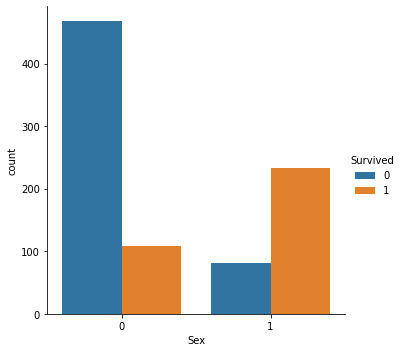

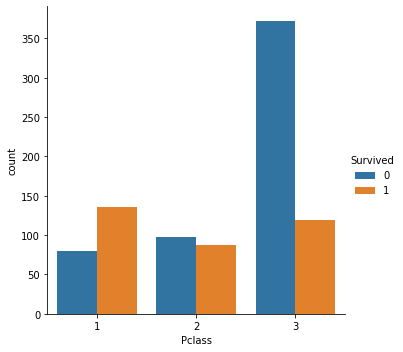

In [58]:
sb.catplot(x='Sex', data=train_full, hue='Survived', kind='count')
sb.catplot(x='Pclass', data=train_full, hue='Survived', kind='count')

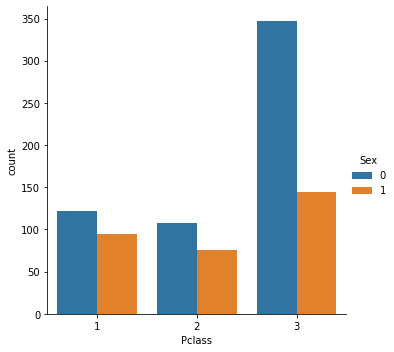

In [59]:
sb.catplot(x='Pclass', data=train_full, hue='Sex', kind='count')

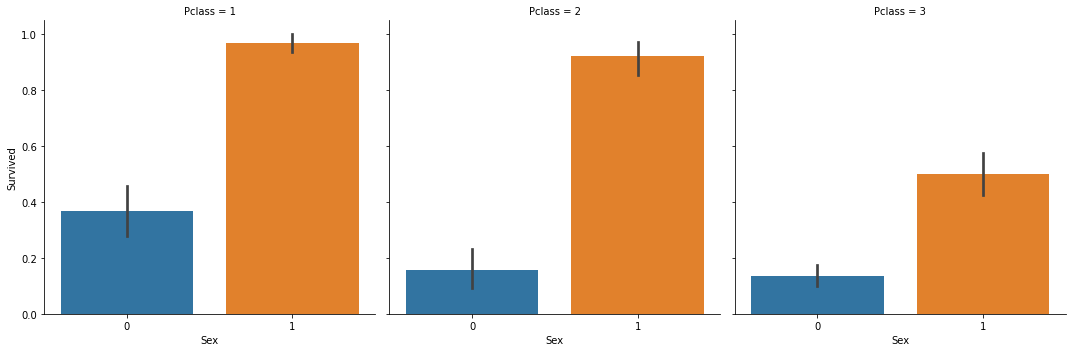

In [60]:
sb.catplot(x='Sex', y='Survived', data=train_full, kind='bar', col='Pclass')

### Очевидные признаки влияющие на выжевание

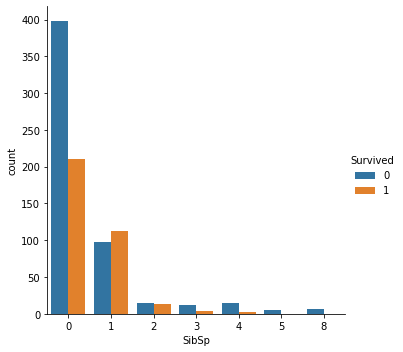

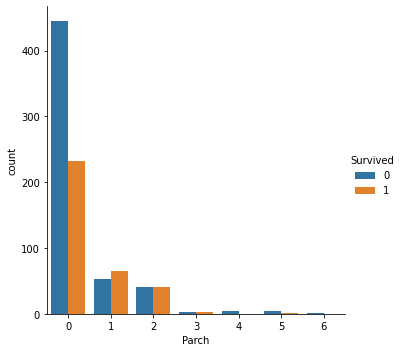

In [61]:
sb.catplot(x='SibSp', data=train_full, hue='Survived', kind='count')
sb.catplot(x='Parch', data=train_full, hue='Survived', kind='count')

<AxesSubplot:>

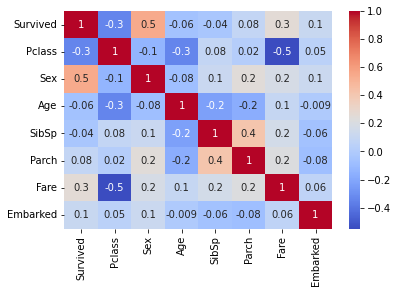

In [62]:
sb.heatmap(train_full.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

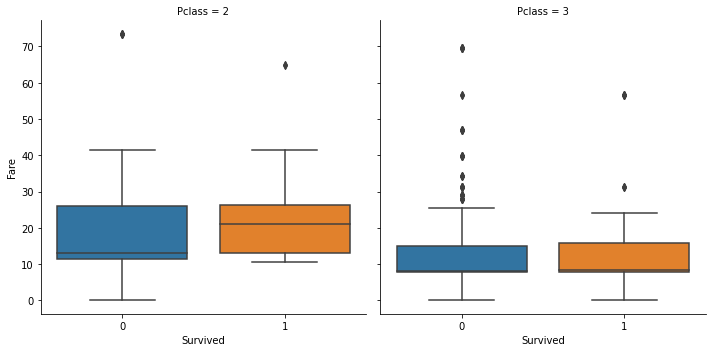

In [63]:
sb.catplot(x='Survived', y='Fare', col='Pclass', kind="box",
           data=train_full[(train_full['Fare'] < 300) & (train_full['Pclass'] > 1)])

### Выбросы по признаку 'Fare' (Удалить?)

-------------

-------------------
## Создаем новый признак

In [64]:
train_full['Family_size'] = train_full['Parch'] + train_full['SibSp']
test_full['Family_size'] = test_full['Parch'] + test_full['SibSp']

In [65]:
train_full.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,1
2,1,1,1,38.0,1,0,71.2833,2,1
3,1,3,1,26.0,0,0,7.9250,1,0
4,1,1,1,35.0,1,0,53.1000,1,1
5,0,3,0,35.0,0,0,8.0500,1,0
6,0,3,0,28.0,0,0,8.4583,3,0
7,0,1,0,54.0,0,0,51.8625,1,0
8,0,3,0,2.0,3,1,21.0750,1,4
9,1,3,1,27.0,0,2,11.1333,1,2


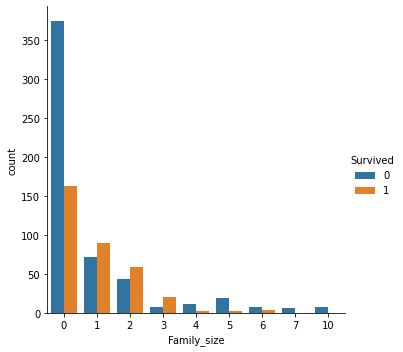

In [66]:
sb.catplot(x='Family_size', data=train_full, hue='Survived', kind='count')

<AxesSubplot:ylabel='Frequency'>

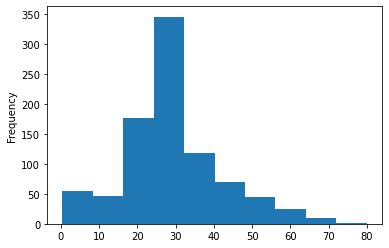

In [68]:
train_full['Age'].plot(kind='hist')

In [76]:
train_full['Age_group'] = train_full['Age'].map(lambda age: int(age // 10))
test_full['Age_group'] = test_full['Age'].map(lambda age: int(age // 10))

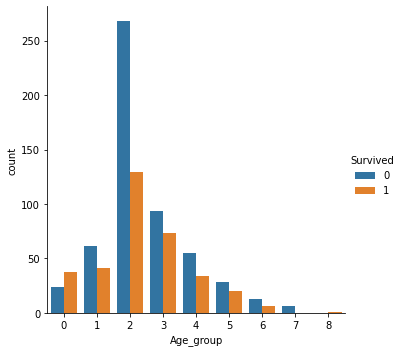

In [75]:
sb.catplot(data=train_full, x='Age_group', hue='Survived', kind='count')

<AxesSubplot:>

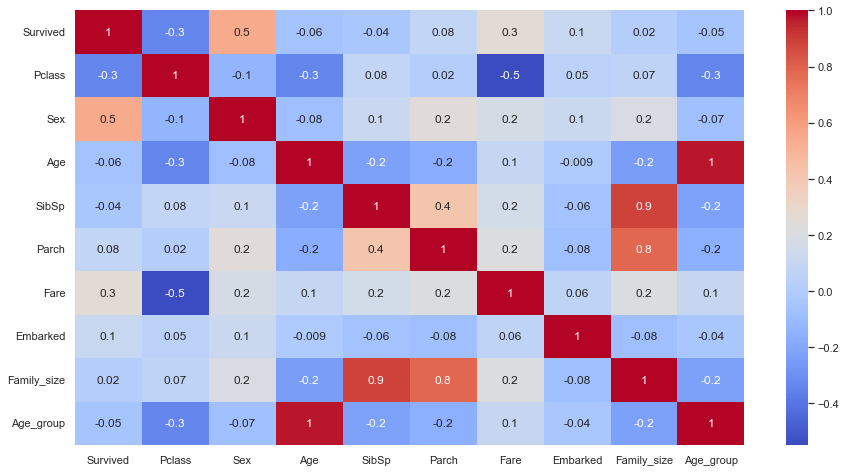

In [83]:
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(train_full.corr(), annot = True, fmt='.1g', cmap='coolwarm')

In [84]:
train_full.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Age_group
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,1.361392,0.904602,2.420875
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,1.613459,1.356289
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,2.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,10.000000,8.000000
